## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19"> Avoiding spin contamination and spatial symmetry breaking by exact-exchange-only optimized-effective-potential methods within the symmetrized Kohn-Sham framework</p>
**Author**: Egor Trushin  
**Date created:** 28/05/2023  
**Last modified:** 23/10/2023   
**Description:** This notebook is for the analysis of data and the preparation of tables and figures for an upcoming article.

**Computational details:** aug-cc-pwCV5Z orbital basis set, *recommended setup* for auxiliary basis preprocessing according to J. Chem. Phys. 155, 054109 (2021) https://doi.org/10.1063/5.0056431  
**Remarks:** Cl, F, O, S, and HS in the spin-symmetrized (SA) case will be excluded.

In [1]:
import json
import os
import matplotlib
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from sets import W4_11
matplotlib.rcParams["axes.unicode_minus"] = False

In [2]:
class config:
    relks_pots = "RELKS/pot/"
    methods = ["Standard", "VH", "SS", "SA", "SS+SA"]
    methods_ = ["Non-symmetrized", "Space-symmetrized", "Spin-symmetrized", "Space- and spin-symmetrized"]
    MOLS = ["ch", "no", "cf", "of", "sih", "sif", "hs", "clo"]
    MOLS_ = ["CH", "NO", "CF", "OF", "SiH", "SiF", "HS", "ClO"]
    ATOMS = ["B", "C", "O", "F", "Al", "Si", "S", "Cl"]
    problematic_atoms = ["Cl", "F", "O", "S"]
    tablefmt = "plain" # "latex"
    save_figs = True

In [3]:
with open("json/atoms_LKI.json", "r", encoding="utf8") as file_obj:
    atoms_lki = json.load(file_obj)
    
with open("json/atoms_RELKS.json", "r", encoding="utf8") as file_obj:
    atoms_relks = json.load(file_obj)

In [4]:
def collect_etot(filename):
    """Parse EXX total energy from output."""
    for line in open(filename, 'r'):
        if "NOT" in line:
            return 0.0
        if "SCEXX Total" in line:
            return float(line.split()[-1])

In [5]:
# Collect total energies for atoms
etot_atoms = dict()
for mthd in config.methods:
    mthd_dict = dict()
    for atm in list(atoms_lki.keys()):
        molpro_output = os.path.join("ATOMS", atm + "_" + mthd, "output")
        mthd_dict[atm] = collect_etot(molpro_output)
    etot_atoms[mthd] = mthd_dict

# Exclude problematic atoms for the SA case
for atom in config.problematic_atoms:
    etot_atoms["SA"][atom] = float("NaN")

In [6]:
# Collect data in list for table
results = []
for atom in list(atoms_lki.keys()):
    results.append([atom, \
                    etot_atoms['VH'][atom], \
                    etot_atoms['SS'][atom],\
                    atoms_lki[atom]['e_ref']])

# print table
print(tabulate(results,
               headers=["Atom", 
                        "Non-symmetrized", 
                        "Space-symmetrized", 
                        "Ref."], floatfmt="11.5f",
               tablefmt=config.tablefmt))

Atom      Non-symmetrized    Space-symmetrized         Ref.
Li               -7.43247             -7.43247     -7.43250
Be              -14.57226            -14.57226    -14.57243
B               -24.53136            -24.52809    -24.52834
C               -37.69184            -37.68877    -37.68891
N               -54.40321            -54.40321    -54.40340
O               -74.81673            -74.81189    -74.81208
F               -99.41373            -99.40895    -99.40922
Ne             -128.54487           -128.54487   -128.54540
Na             -161.85762           -161.85762   -161.85660
Mg             -199.61176           -199.61176   -199.61160
Al             -241.87709           -241.87351   -241.87330
Si             -288.85419           -288.85013   -288.85070
P              -340.71415           -340.71415   -340.71500
S              -397.50738           -397.50066   -397.50160
Cl             -459.48343           -459.47665   -459.47760
Ar             -526.81151           -526

In [7]:
# Collect data in list for table
results = []
for atom in list(atoms_lki.keys()):
    results.append([atom, \
                    etot_atoms['SS'][atom],\
                    atoms_lki[atom]['e_ref'],\
                    etot_atoms['SS'][atom]-atoms_lki[atom]['e_ref'],\
                    (etot_atoms['SS'][atom]-atoms_lki[atom]['e_ref'])/atoms_lki[atom]['e_ref']*100])

# print table
print(tabulate(results,
               headers=["Atom", 
                        "Space-symmetrized", 
                        "Ref.",\
                        "Absolute Error",\
                        "Relative Error in %"], floatfmt="11.5f",
               tablefmt=config.tablefmt))

Atom      Space-symmetrized         Ref.    Absolute Error    Relative Error in %
Li                 -7.43247     -7.43250           0.00003               -0.00040
Be                -14.57226    -14.57243           0.00017               -0.00116
B                 -24.52809    -24.52834           0.00025               -0.00103
C                 -37.68877    -37.68891           0.00014               -0.00037
N                 -54.40321    -54.40340           0.00019               -0.00035
O                 -74.81189    -74.81208           0.00019               -0.00026
F                 -99.40895    -99.40922           0.00027               -0.00027
Ne               -128.54487   -128.54540           0.00053               -0.00041
Na               -161.85762   -161.85660          -0.00102                0.00063
Mg               -199.61176   -199.61160          -0.00016                0.00008
Al               -241.87351   -241.87330          -0.00021                0.00009
Si              

In [8]:
# This plot is not expected to be used in the article

## collect data for plot
#results = []
#for atom in list(atoms_lki.keys()):
#    results.append([etot_atoms['VH'][atom], \
#                    etot_atoms['SS'][atom],\
#                    atoms_lki[atom]['e_ref']])
#np_res = np.array(results)
#
## actual plotting
#fig, ax = plt.subplots(1, 1, figsize=(7.5,3.75))
#X = np.arange(len(list(atoms_lki.keys())))
#plt.axhline(y = 0.0, color = 'k', linestyle = ':', linewidth=1)
#plt.ylim(-0.0066,0.0012)
#plt.bar(X - 0.225, np_res[:,0]-np_res[:,-1], color = 'orangered', edgecolor = "black", width = 0.45, label = 'Non-symmetrized')
#plt.bar(X + 0.225, np_res[:,1]-np_res[:,-1], color = 'dodgerblue', edgecolor = "black", width = 0.45, label = 'Space-symmetrized')
#plt.yticks(fontsize=16)
#plt.xticks(range(len(list(atoms_lki.keys()))), list(atoms_lki.keys()), fontsize=16)
#plt.ylabel("E$_{calc}$ - E$_{ref}$ (Hartree)", fontsize=18)
#plt.legend(frameon=False, fontsize=16, loc=3)
#plt.tight_layout()
## if config.save_figs:
##    plt.savefig('ediff_LKI_ref.eps', format='eps')
#plt.show()

In [9]:
# collect data for table
results = []
for atom in list(atoms_lki.keys()):
    if atom in list(atoms_relks.keys()):
        results.append([atom, \
                        etot_atoms['VH'][atom], \
                        etot_atoms['SS'][atom], \
                        etot_atoms['SA'][atom], \
                        etot_atoms['SS+SA'][atom],\
                        atoms_relks[atom]['e_ref']])
    else:
        results.append([atom, \
                        etot_atoms['VH'][atom], \
                        etot_atoms['SS'][atom], \
                        etot_atoms['SA'][atom], \
                        etot_atoms['SS+SA'][atom]])

# print table
print(tabulate(results,
               headers=["Atom",
                        "Non-symmetrized",
                        "Space-symmetrized",
                        "Spin-symmetrized",
                        "Space- and spin-symmetrized",
                        "Ref."],
               floatfmt="11.5f",
               tablefmt=config.tablefmt))

Atom      Non-symmetrized    Space-symmetrized    Spin-symmetrized    Space- and spin-symmetrized         Ref.
Li               -7.43247             -7.43247            -7.43230                       -7.43230     -7.43238
Be              -14.57226            -14.57226           -14.57226                      -14.57226    -14.57243
B               -24.53136            -24.52809           -24.52760                      -24.52749    -24.52775
C               -37.69184            -37.68877           -37.68655                      -37.68641
N               -54.40321            -54.40321           -54.39795                      -54.39795
O               -74.81673            -74.81189           nan                            -74.80745
F               -99.41373            -99.40895           nan                            -99.40748    -99.40774
Ne             -128.54487           -128.54487          -128.54487                     -128.54487   -128.54541
Na             -161.85762           -161

In [10]:
# collect data for table
results = []
for atom in list(atoms_relks.keys()):
    results.append([atom, \
                    etot_atoms['SS+SA'][atom],\
                    atoms_relks[atom]['e_ref'],\
                    etot_atoms['SS+SA'][atom]-atoms_relks[atom]['e_ref'],\
                    (etot_atoms['SS+SA'][atom]-atoms_relks[atom]['e_ref'])/atoms_relks[atom]['e_ref']*100])

# print table
print(tabulate(results,
               headers=["Atom",
                        "Space- and spin-symmetrized",
                        "Ref.",
                        "Difference",
                        "relative error in %"],
               floatfmt="11.5f",
               tablefmt=config.tablefmt))

Atom      Space- and spin-symmetrized         Ref.    Difference    relative error in %
Li                           -7.43230     -7.43238       0.00008               -0.00104
Be                          -14.57226    -14.57243       0.00017               -0.00118
B                           -24.52749    -24.52775       0.00025               -0.00103
F                           -99.40748    -99.40774       0.00027               -0.00027
Ne                         -128.54487   -128.54541       0.00054               -0.00042
Na                         -161.85740   -161.85630      -0.00110                0.00068
Mg                         -199.61176   -199.61158      -0.00018                0.00009
Al                         -241.87337   -241.87321      -0.00016                0.00007
Cl                         -459.47609   -459.47708       0.00099               -0.00022
Ar                         -526.81151   -526.81222       0.00071               -0.00013


In [11]:
# This plot is not expected to be used in the article

## collect data
#results = []
#for atom in list(atoms_relks.keys()):
#    results.append([etot_atoms['VH'][atom], \
#                    etot_atoms['SS'][atom], \
#                    etot_atoms['SA'][atom], \
#                    etot_atoms['SS+SA'][atom],\
#                    atoms_relks[atom]['e_ref']])
#np_res = np.array(results)
#
## actual plotting
#fig, ax = plt.subplots(1, 1, figsize=(7.5,5.0))
#X = np.arange(len(list(atoms_relks.keys())))
#plt.axhline(y = 0.0, color = 'k', linestyle = ':', linewidth=1)
#plt.bar(X - 0.33, np_res[:,0]-np_res[:,-1], color = 'orangered', edgecolor = "black", width = 0.22, label = 'Non-symmetrized')
#plt.bar(X - 0.11, np_res[:,1]-np_res[:,-1], color = 'dodgerblue', edgecolor = "black", width = 0.22, label = 'Space-symmetrized')
#plt.bar(X + 0.11, np_res[:,2]-np_res[:,-1], color = 'green', edgecolor = "black", width = 0.22, label = 'Spin-symmetrized')
#plt.bar(X + 0.33, np_res[:,3]-np_res[:,-1], color = 'orange', edgecolor = "black", width = 0.22, label = 'Space- and spin-symmetrized')
#plt.yticks(fontsize=14)
#plt.xticks(range(len(list(atoms_relks.keys()))), list(atoms_relks.keys()), fontsize=16)
#plt.ylabel("E$_{calc}$ - E$_{ref}$ (Hartree)", fontsize=18)
#plt.legend(frameon=False, bbox_to_anchor =(0.5,-0.3), loc='lower center', ncol=2, fontsize=16)
#plt.tight_layout()
##if config.save_figs:
##    plt.savefig('ediff_RELKS_ref.eps', format='eps')
#plt.show()

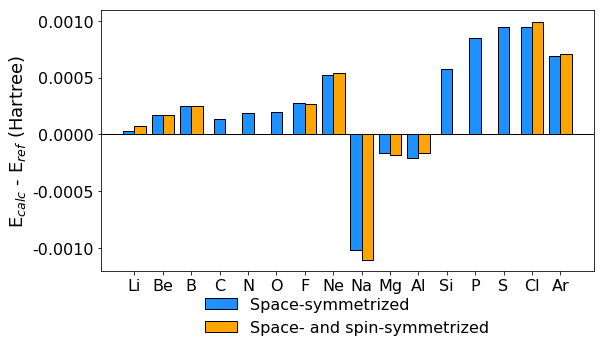

In [12]:
# collect data for plot
results = []
for atom in list(atoms_lki.keys()):
    results.append(etot_atoms['SS'][atom]-atoms_lki[atom]['e_ref'])
np_res = np.array(results)

# collect data
results = []
for atom in list(atoms_relks.keys()):
    results.append(etot_atoms['SS+SA'][atom] - atoms_relks[atom]['e_ref'])
np_res2 = np.array(results)

fig, ax = plt.subplots(1, 1, figsize=(8.5,5.0))

plt.axhline(y = 0.0, color = 'k', linestyle = '-', linewidth=1)

X = np.arange(len(list(atoms_lki.keys())))
for i, x in enumerate(X):
    if i in [0, 1, 2, 6, 7, 8, 9, 10, 14, 15]:
        plt.bar(x-0.2, np_res[i], color = 'dodgerblue', edgecolor = "black", width = 0.4, label = 'Space-symmetrized' if i==0 else None)
    else:
        plt.bar(x, np_res[i], color = 'dodgerblue', edgecolor = "black", width = 0.4, label = 'Space-symmetrized' if i==0 else None)

X = np.array([0, 1, 2, 6, 7, 8, 9, 10, 14, 15])
plt.bar(X+0.2, np_res2, color = 'orange', edgecolor = "black", width = 0.4, label = 'Space- and spin-symmetrized')

plt.yticks(fontsize=16)
plt.xticks(range(len(list(atoms_lki.keys()))), list(atoms_lki.keys()), fontsize=16)
plt.ylabel("E$_{calc}$ - E$_{ref}$ (Hartree)", fontsize=18)
plt.legend(frameon=False, bbox_to_anchor =(0.5,-0.3), loc='lower center', ncol=1, fontsize=16)
plt.tight_layout()
if config.save_figs:
    plt.savefig('atoms_ediff_wrt_ref.eps', format='eps')
plt.show()

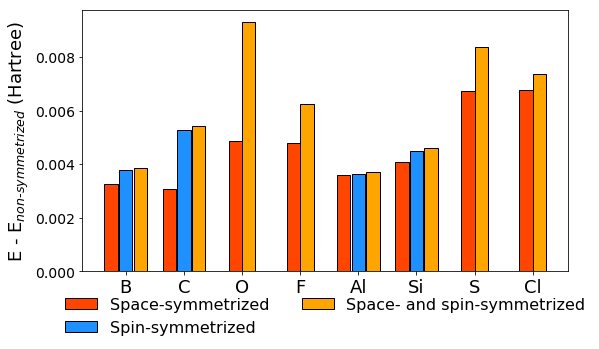

In [13]:
# collect data for plot
results = []
for atom in config.ATOMS:
    if atom in ["F", "Cl", "O", "S"]:
        results.append([etot_atoms['SS'][atom] - etot_atoms['VH'][atom], \
                        0.0, \
                        etot_atoms['SS+SA'][atom] - etot_atoms['VH'][atom]])        
    else:
        results.append([etot_atoms['SS'][atom] - etot_atoms['VH'][atom], \
                        etot_atoms['SA'][atom] - etot_atoms['VH'][atom], \
                        etot_atoms['SS+SA'][atom] - etot_atoms['VH'][atom]])
np_res = np.array(results)

# actual plotting
fig, ax = plt.subplots(1, 1, figsize=(8.5,5.0))
plt.axhline(y = 0.0, color = 'k', linestyle = ':', linewidth=1)

X = np.arange(len(config.ATOMS))

for i, x in enumerate(X):
    if abs(np_res[i,1]) > 1.0e-14:
        plt.bar(x - 0.25, np_res[i,0], color = 'orangered', edgecolor = "black", width = 0.23, label = 'Space-symmetrized' if i==0 else None)
        plt.bar(x - 0.0, np_res[i,1], color = 'dodgerblue', edgecolor = "black", width = 0.23, label = 'Spin-symmetrized' if i==0 else None)
        plt.bar(x + 0.25, np_res[i,2], color = 'orange', edgecolor = "black", width = 0.23, label = 'Space- and spin-symmetrized' if i==0 else None)
    else:
        plt.bar(x - 0.115, np_res[i,0], color = 'orangered', edgecolor = "black", width = 0.23, label = 'Space-symmetrized' if i==0 else None)
        plt.bar(x + 0.115, np_res[i,2], color = 'orange', edgecolor = "black", width = 0.23, label = 'Space- and spin-symmetrized' if i==0 else None)        
plt.yticks(fontsize=14)
plt.xticks(range(len(list(config.ATOMS))), list(config.ATOMS), fontsize=18)
plt.ylabel("E - E$_{non{-}symmetrized}$ (Hartree)".replace('-', '\u2010'), fontsize=18)
plt.legend(frameon=False, bbox_to_anchor =(0.5,-0.3), loc='lower center', ncol=2, fontsize=16)
plt.tight_layout()
if config.save_figs:
    plt.savefig('ediff_atoms_wrt_nonsym.eps', format='eps')
plt.show()

In [14]:
results = []
for atom in config.ATOMS:
    if atom in ["F", "Cl", "O", "S"]:
        results.append([atom,
                        etot_atoms['SS'][atom] - etot_atoms['VH'][atom], \
                        0.0, \
                        etot_atoms['SS+SA'][atom] - etot_atoms['VH'][atom]])        
    else:
        results.append([atom,
                        etot_atoms['SS'][atom] - etot_atoms['VH'][atom], \
                        etot_atoms['SA'][atom] - etot_atoms['VH'][atom], \
                        etot_atoms['SS+SA'][atom] - etot_atoms['VH'][atom]])

print(tabulate(results,
               headers=["Atom", "SS", "SA", "SS+SA"],
               floatfmt="11.7f"))

Atom             SS           SA        SS+SA
------  -----------  -----------  -----------
B         0.0032767    0.0037688    0.0038690
C         0.0030665    0.0052821    0.0054251
O         0.0048460    0.0000000    0.0092836
F         0.0047827    0.0000000    0.0062544
Al        0.0035799    0.0036171    0.0037209
Si        0.0040686    0.0044862    0.0046018
S         0.0067183    0.0000000    0.0083639
Cl        0.0067794    0.0000000    0.0073437


In [15]:
def load_vx_molpro(filename):
    """Reads exchange potentials from file
    provided by Molpro."""
    coord = list()
    pot = list()
    for line in open(filename):
        aux = line.split()
        coord.append(float(aux[4]))
        pot.append(float(aux[8]))
    coord = np.array(coord)
    pot = np.array(pot)
    return coord, pot

In [16]:
def load_vx_relks(filename):
    """Reads exchange potential from file provided by RELKS"""
    with open(filename) as file_obj:
        lines = file_obj.readlines()[8:]
    coord = list()
    pot = list()
    for line in lines:
        aux = line.split()
        coord.append(float(aux[0]))
        pot.append(float(aux[8]))
    coord = np.array(coord)
    pot = np.array(pot)
    return coord, pot

In [17]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)

def plot_satom(ATOM):
    print(ATOM)
    fig, axs = plt.subplots(2, 2, figsize=(8,8))

    
    axs[0, 0].set_xlim(0.01, 20.0)
    axs[1, 0].set_xlim(0.01, 20.0)
    axs[0, 1].set_xlim(0.01, 20.0)
    axs[1, 1].set_xlim(0.01, 20.0)
    axs[0, 0].set_xscale("log")
    axs[1, 0].set_xscale("log")
    axs[0, 1].set_xscale("log")
    axs[1, 1].set_xscale("log")
    axs[0, 0].set_ylabel('Potential (Hartree)', fontsize=16)
    axs[1, 0].set_ylabel('Potential (Hartree)', fontsize=16)
    axs[1, 0].set_xlabel('r (a$_0$)', fontsize=16)
    axs[1, 1].set_xlabel('r (a$_0$)', fontsize=16)
    axs[0, 0].set_title('Non-symmetrized', fontsize=16)
    axs[0, 1].set_title('Space-symmetrized', fontsize=16)
    axs[1, 0].set_title('Spin-symmetrized', fontsize=16)
    axs[1, 1].set_title('Space- and spin-symmetrized', fontsize=16)

    coord, pot = load_vx_molpro(f'ATOMS/{ATOM}_VH/vxa-final.x')
    axs[0, 0].plot(coord, pot, '-', color="orangered", label=r'$v_{x\alpha}^x$')
    coord, pot = load_vx_molpro(f'ATOMS/{ATOM}_VH/vxa-final.y')
    axs[0, 0].plot(coord, pot, '-', color="orange", label=r'$v_{x\alpha}^y$')
    coord, pot = load_vx_molpro(f'ATOMS/{ATOM}_VH/vxa-final.z')
    axs[0, 0].plot(coord, pot, '-', color="green", label=r'$v_{x\alpha}^z$')

    coord, pot = load_vx_molpro(f'ATOMS/{ATOM}_SS/vxa-final.z')
    axs[0, 1].plot(coord, pot, '-', color="orangered", label=r'$v_{x\alpha}$')
    coord, pot = load_vx_molpro(f'ATOMS/{ATOM}_SS/vxb-final.z')
    axs[0, 1].plot(coord, pot, '-', color="dodgerblue", label=r'$v_{x\beta}$')  

    coord, pot = load_vx_molpro(f'ATOMS/{ATOM}_SA/vxa-final.x')
    axs[1, 0].plot(coord, pot, '-', color="orangered", label=r'$v_{x}^x$')
    coord, pot = load_vx_molpro(f'ATOMS/{ATOM}_SA/vxa-final.y')
    axs[1, 0].plot(coord, pot, '-', color="orange", label=r'$v_{x}^y$')
    coord, pot = load_vx_molpro(f'ATOMS/{ATOM}_SA/vxa-final.z')
    axs[1, 0].plot(coord, pot, '-', color="green", label=r'$v_{x}^z$')

    coord, pot = load_vx_molpro(f'ATOMS/{ATOM}_SS+SA/vxa-final.z')
    axs[1, 1].plot(coord, pot, '-', color="orangered", label='$v_{x}$')

    coord, pot = load_vx_relks(f'RELKS/pot/{ATOM}.pot')
    axs[0, 0].plot(coord, pot, ':', color="black", label='Ref')
    axs[1, 0].plot(coord, pot, ':', color="black", label='Ref')
    axs[0, 1].plot(coord, pot, ':', color="black", label='Ref')
    axs[1, 1].plot(coord, pot, ':', color="black", label='Ref')
    
    axs[0, 0].legend(frameon=False, fontsize=16, loc=4)
    axs[0, 1].legend(frameon=False, fontsize=16, loc=4)
    axs[1, 0].legend(frameon=False, fontsize=16, loc=4)
    axs[1, 1].legend(frameon=False, fontsize=16, loc=4)
    
    plt.text(0.02, 0.9, "(a)", fontsize=22, weight="medium", transform=axs[0, 0].transAxes)
    plt.text(0.02, 0.9, "(b)", fontsize=22, weight="medium", transform=axs[0, 1].transAxes)
    plt.text(0.02, 0.9, "(c)", fontsize=22, weight="medium", transform=axs[1, 0].transAxes)
    plt.text(0.02, 0.9, "(d)", fontsize=22, weight="medium", transform=axs[1, 1].transAxes)
    
    plt.tight_layout()
    if config.save_figs:
        plt.savefig(f'{ATOM}.eps', format='eps')
    plt.show()

B


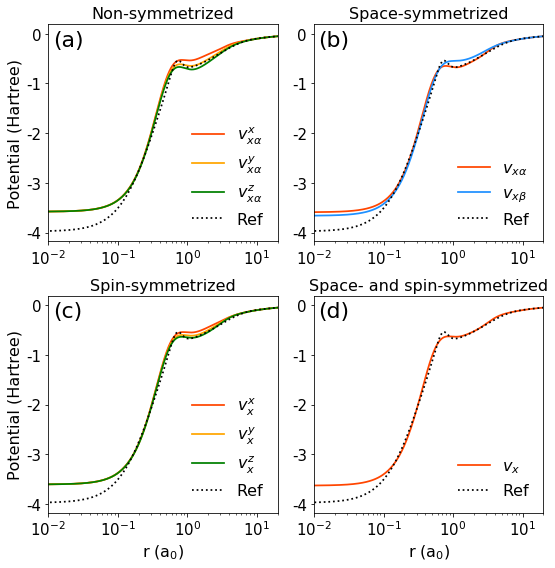

In [18]:
plot_satom("B")

Al


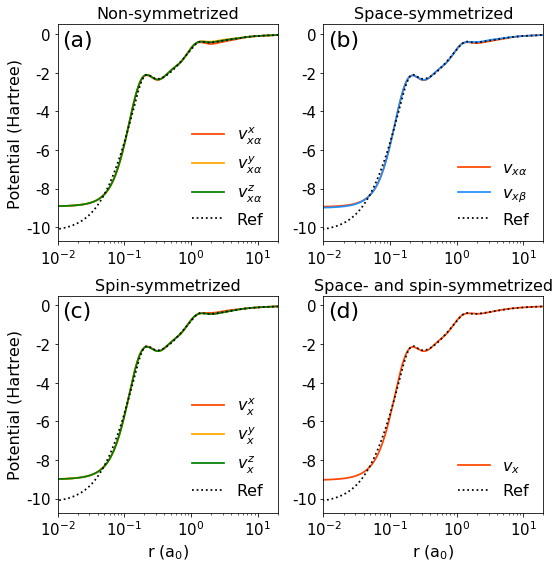

In [19]:
plot_satom("Al")

In [20]:
def collect_energies(filename):
    """Parse energy contributions from output"""
    etot = 0.0
    eone = 0.0
    etwo = 0.0
    ecoul = 0.0
    ex = 0.0
    for line in open(filename, 'r'):
        if "SCEXX Total" in line:
            etot = float(line.split()[-1])
        if "SCEXX One-electron energy" in line:
            eone = float(line.split()[-1])
        if "SCEXX Two-electron energy" in line:
            etwo = float(line.split()[-1])
        if "SCEXX Kinetic energy" in line:
            ekin = float(line.split()[-1])
        if "SCEXX Electron-nuclear energy" in line:
            eeln = float(line.split()[-1])
        if "SCEXX Coulomb energy" in line:
            ecoul = float(line.split()[-1])
        if "SCEXX Exchange energy" in line:
            ex = float(line.split()[-1])
    return {"etot": etot, "e1": eone, "e2": etwo, "ec": ecoul, "ex": ex, "ekin": ekin, "eeln": eeln}

In [21]:
# collect energy contribution for atoms
es_atoms = dict()
for mthd in config.methods:
    mthd_dict = dict()
    for atm in config.ATOMS:
        molpro_output = os.path.join("ATOMS", atm + "_" + mthd, "output")
        mthd_dict[atm] = collect_energies(molpro_output)
    es_atoms[mthd] = mthd_dict

# Exclude problematic atoms for the SA case
for atom in config.problematic_atoms:
    es_atoms["SA"][atom]["etot"] = float("NaN")
    es_atoms["SA"][atom]["e1"] = float("NaN")
    es_atoms["SA"][atom]["e2"] = float("NaN")
    es_atoms["SA"][atom]["ec"] = float("NaN")
    es_atoms["SA"][atom]["ex"] = float("NaN")
    es_atoms["SA"][atom]["ekin"] = float("NaN")
    es_atoms["SA"][atom]["eeln"] = float("NaN")

In [22]:
for atom in config.ATOMS:
    print("\n", atom)
    res_at = []
    for i, mthd in enumerate(["VH", "SS", "SA", "SS+SA"]):
        res_at.append([config.methods_[i],\
                       es_atoms[mthd][atom]["etot"],\
                       es_atoms[mthd][atom]["e1"],\
                       es_atoms[mthd][atom]["e2"],\
                       es_atoms[mthd][atom]["ekin"],\
                       es_atoms[mthd][atom]["eeln"],\
                       es_atoms[mthd][atom]["ec"],\
                       es_atoms[mthd][atom]["ex"]])
    print(tabulate(res_at, \
                   headers=["Method", \
                            "Total", \
                            "1-el", \
                            "2-el", \
                            "Kinetic",\
                            "Electron-nuclear",\
                            "Coulomb", \
                            "Exchange"], \
                   floatfmt="11.5f",
                   tablefmt=config.tablefmt))


 B
Method                             Total         1-el         2-el      Kinetic    Electron-nuclear      Coulomb     Exchange
Non-symmetrized                -24.53136    -32.37037      7.83901     24.52241           -56.89278     11.60553     -3.76652
Space-symmetrized              -24.52809    -32.37054      7.84246     24.51910           -56.88964     11.60003     -3.75758
Spin-symmetrized               -24.52760    -32.36735      7.83976     24.51836           -56.88571     11.59621     -3.75646
Space- and spin-symmetrized    -24.52749    -32.36714      7.83965     24.51830           -56.88544     11.59492     -3.75527

 C
Method                             Total         1-el         2-el      Kinetic    Electron-nuclear      Coulomb     Exchange
Non-symmetrized                -37.69184    -50.45183     12.75999     37.68443           -88.13626     17.83319     -5.07320
Space-symmetrized              -37.68877    -50.45279     12.76402     37.68126           -88.13405     17.829

In [23]:
# collect total energy for molecules
etot_molecules = dict()
for mthd in config.methods:
    mthd_dict = dict()
    for mol in config.MOLS:
        molpro_output = os.path.join("MOLECULES", mol + "_" + mthd, "output")
        mthd_dict[mol] = collect_etot(molpro_output)
    etot_molecules[mthd] = mthd_dict

# Exclude HS in the SA case
etot_molecules["SA"]["hs"] = float("NaN")

In [24]:
# collect list for table
results = []
for i, mol in enumerate(config.MOLS):
    results.append([config.MOLS_[i], \
                    etot_molecules['VH'][mol], \
                    etot_molecules['SS'][mol], \
                    etot_molecules['SA'][mol], \
                    etot_molecules['SS+SA'][mol]])

# print table
print(tabulate(results,
               headers=["Molecule",
                        "Non-symmetrized",
                        "Space-symmetrized",
                        "Spin-symmetrized",
                        "Space- and spin-symmetrized"],
               floatfmt="11.5f",
               tablefmt=config.tablefmt))

Molecule      Non-symmetrized    Space-symmetrized    Spin-symmetrized    Space- and spin-symmetrized
CH                  -38.28164            -38.27915           -38.27645                      -38.27608
NO                 -129.30120           -129.29703          -129.29235                     -129.29106
CF                 -137.23141           -137.22783          -137.22407                     -137.22338
OF                 -174.20035           -174.19458          -174.18582                     -174.18490
SiH                -289.43708           -289.43396          -289.43167                     -289.43142
SiF                -388.42540           -388.42160          -388.41971                     -388.41950
HS                 -398.10406           -398.09932           nan                           -398.09695
ClO                -534.30316           -534.29341          -534.28147                     -534.27864


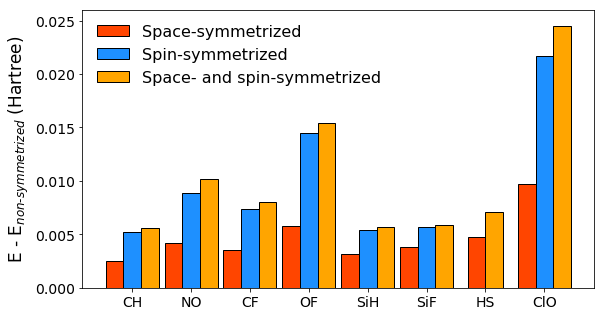

In [25]:
# collect data for plot
results = []
for mol in config.MOLS:
    results.append([etot_molecules['SS'][mol]-etot_molecules['VH'][mol], \
                    etot_molecules['SA'][mol]-etot_molecules['VH'][mol], \
                    etot_molecules['SS+SA'][mol]-etot_molecules['VH'][mol]])
np_res = np.array(results)

# actual plotting
fig, ax = plt.subplots(1, 1, figsize=(8.5,4.5))
X = np.arange(len(config.MOLS))
plt.ylim(0,0.026)

for i, x in enumerate(X):
    if abs(np_res[i,1]) > 1.0e-14:
        plt.bar(x - 0.3, np_res[i,0], color = 'orangered', edgecolor = "black", width = 0.3, label = 'Space-symmetrized' if i==0 else None)
        plt.bar(x - 0.0, np_res[i,1], color = 'dodgerblue', edgecolor = "black", width = 0.3, label = 'Spin-symmetrized' if i==0 else None)
        plt.bar(x + 0.3, np_res[i,2], color = 'orange', edgecolor = "black", width = 0.3, label = 'Space- and spin-symmetrized' if i==0 else None)
    else:
        plt.bar(x - 0.15, np_res[i,0], color = 'orangered', edgecolor = "black", width = 0.3, label = 'Space-symmetrized' if i==0 else None)
        plt.bar(x + 0.15, np_res[i,2], color = 'orange', edgecolor = "black", width = 0.3, label = 'Space- and spin-symmetrized' if i==0 else None)
plt.yticks(fontsize=14)
plt.xticks(range(len(config.MOLS)), config.MOLS_, fontsize=14)
plt.ylabel(r"E - E$_{non{-}symmetrized}$ (Hartree)".replace('-', '\u2010'), fontsize=17)
plt.legend(frameon=False, fontsize=16)
plt.tight_layout()
if config.save_figs:
    plt.savefig('molecules_etot_diff.eps', format='eps')
plt.show()

In [26]:
results = []
for mol in config.MOLS:
    results.append([etot_molecules['SS'][mol]-etot_molecules['VH'][mol], \
                    etot_molecules['SA'][mol]-etot_molecules['VH'][mol], \
                    etot_molecules['SS+SA'][mol]-etot_molecules['VH'][mol]])

print(tabulate(results,
               headers=["Molecule", "SS", "SA", "SS+SA"],
               floatfmt="11.7f"))

   Molecule                   SS           SA
-----------  -------------------  -----------
  0.0024928            0.0051970    0.0055597
  0.0041655            0.0088495    0.0101388
  0.0035820            0.0073372    0.0080283
  0.0057624            0.0145287    0.0154492
  0.0031157            0.0054059    0.0056574
  0.0038041            0.0056873    0.0059001
  0.0047360          nan            0.0071076
  0.0097490            0.0216915    0.0245252


In [27]:
# collect energy contributions for molecules
es_molecule = dict()
for mthd in config.methods:
    mthd_dict = dict()
    for mol in config.MOLS:
        molpro_output = os.path.join("MOLECULES", mol + "_" + mthd, "output")
        mthd_dict[mol] = collect_energies(molpro_output)
    es_molecule[mthd] = mthd_dict

# Exclude HS in the SA case
es_molecule["SA"]["hs"]["etot"] = float("NaN")
es_molecule["SA"]["hs"]["e1"] = float("NaN")
es_molecule["SA"]["hs"]["e2"] = float("NaN")
es_molecule["SA"]["hs"]["ekin"] = float("NaN")
es_molecule["SA"]["hs"]["eeln"] = float("NaN")
es_molecule["SA"]["hs"]["ec"] = float("NaN")
es_molecule["SA"]["hs"]["ex"] = float("NaN")

In [28]:
# collect and print data for molecules
for j, mol in enumerate(config.MOLS):
    print("\n", config.MOLS_[j])
    res_at = []
    for i, mthd in enumerate(["VH", "SS", "SA", "SS+SA"]):
        res_at.append([config.methods_[i], \
                       es_molecule[mthd][mol]["etot"], \
                       es_molecule[mthd][mol]["e1"], \
                       es_molecule[mthd][mol]["e2"], \
                       es_molecule[mthd][mol]["ekin"], \
                       es_molecule[mthd][mol]["eeln"],\
                       es_molecule[mthd][mol]["ec"], \
                       es_molecule[mthd][mol]["ex"]])
    print(tabulate(res_at, \
                   headers=["Method", \
                            "Total", \
                            "1-el", \
                            "2-el", \
                            "Kinetic",\
                            "Electron-nuclear",\
                            "Coulomb energy", \
                            "Exchange energy"], \
                   floatfmt="11.5f",
                   tablefmt=config.tablefmt))


 CH
Method                             Total         1-el         2-el      Kinetic    Electron-nuclear    Coulomb energy    Exchange energy
Non-symmetrized                -38.28164    -56.61063     15.49479     38.25368           -94.86431          20.91396           -5.41917
Space-symmetrized              -38.27915    -56.61107     15.49772     38.25020           -94.86127          20.91079           -5.41307
Spin-symmetrized               -38.27645    -56.61040     15.49975     38.24574           -94.85614          20.90643           -5.40668
Space- and spin-symmetrized    -38.27608    -56.61045     15.50016     38.24489           -94.85534          20.90532           -5.40516

 NO
Method                             Total         1-el         2-el      Kinetic    Electron-nuclear    Coulomb energy    Exchange energy
Non-symmetrized               -129.30120   -227.65723     72.64999    129.09979          -356.75702          87.36827          -14.71828
Space-symmetrized             -

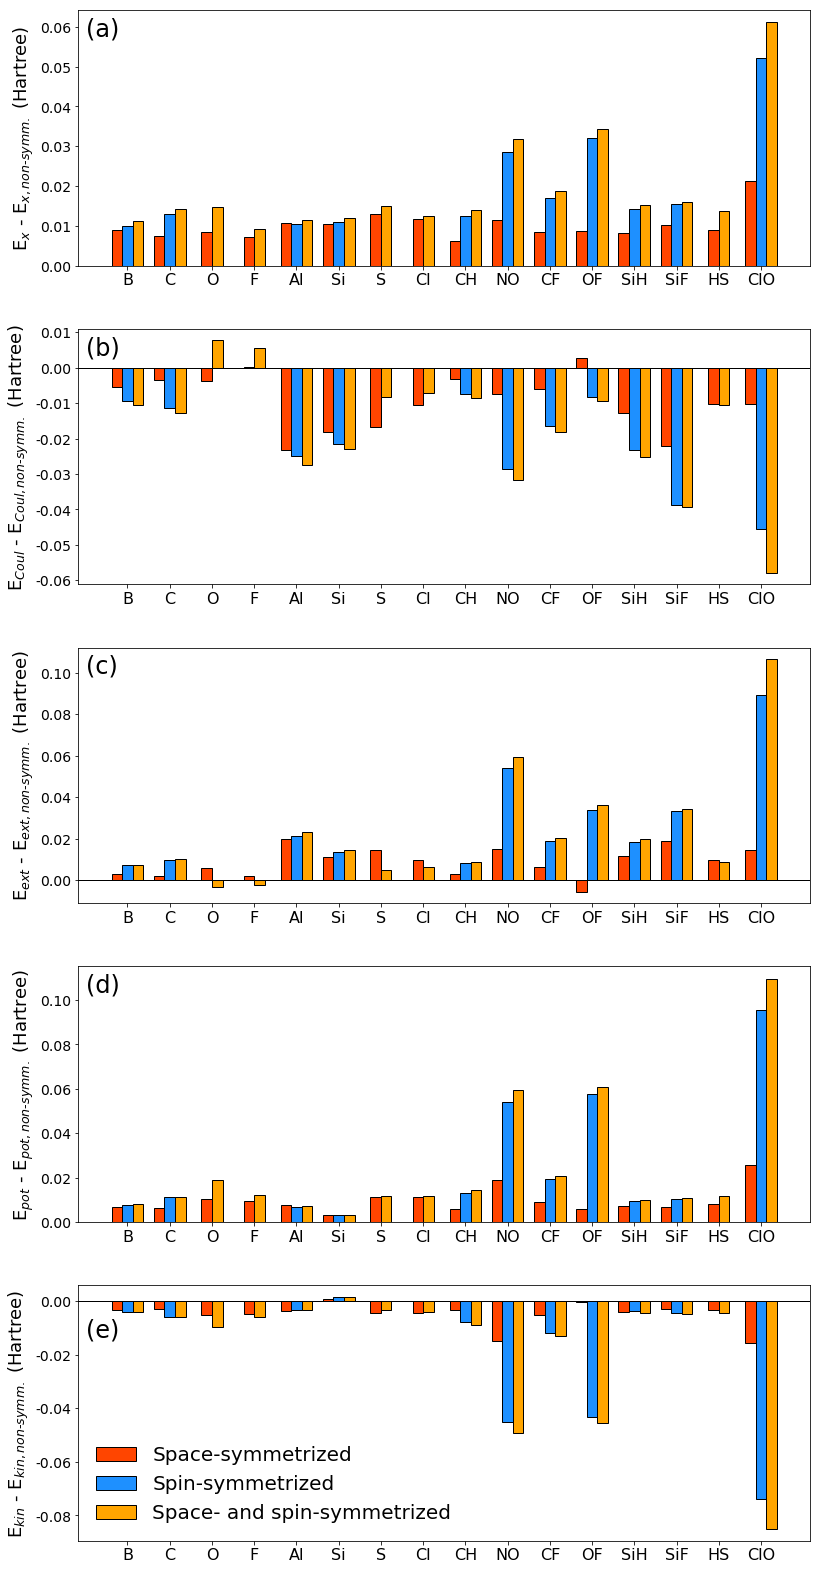

In [29]:
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
fig, ax = plt.subplots(5, 1, figsize=(11.5,22.))

# first plot
res = []
for atom in config.ATOMS:
    res.append([es_atoms["SS"][atom]["ex"]-es_atoms["VH"][atom]["ex"],\
                es_atoms["SA"][atom]["ex"]-es_atoms["VH"][atom]["ex"],\
                es_atoms["SS+SA"][atom]["ex"]-es_atoms["VH"][atom]["ex"]])
for mol in config.MOLS:
    res.append([es_molecule["SS"][mol]["ex"]-es_molecule["VH"][mol]["ex"],\
                es_molecule["SA"][mol]["ex"]-es_molecule["VH"][mol]["ex"],\
                es_molecule["SS+SA"][mol]["ex"]-es_molecule["VH"][mol]["ex"]])

data = np.transpose(res)
X = np.arange(len(config.ATOMS)+len(config.MOLS_))

for i, x in enumerate(X):
    if abs(data[1][i]) > 1.0e-14:
        ax[0].bar(x - 0.25, data[0][i], color = 'orangered', edgecolor = "black", width = 0.25, label = 'Space-symmetrized' if i==0 else None)
        ax[0].bar(x, data[1][i], color = 'dodgerblue', edgecolor = "black", width = 0.25, label = 'Spin-symmetrized' if i==0 else None)
        ax[0].bar(x + 0.25, data[2][i], color = 'orange', edgecolor = "black", width = 0.25, label = 'Space- and spin-symmetrized' if i==0 else None)
    else:
        ax[0].bar(x - 0.125, data[0][i], color = 'orangered', edgecolor = "black", width = 0.25, label = 'Space-symmetrized' if i==0 else None)
        ax[0].bar(x + 0.125, data[2][i], color = 'orange', edgecolor = "black", width = 0.25, label = 'Space- and spin-symmetrized' if i==0 else None)

ax[0].set_xticks(range(len(config.ATOMS)+len(config.MOLS)))
ax[0].set_xticklabels(config.ATOMS+config.MOLS_, fontsize=16)  
ax[0].set_ylabel(r"E$_x$ - E$_{x, non{-}symm.}$ (Hartree)".replace('-', '\u2010'), fontsize=18)

# second plot
res = []
for atom in config.ATOMS:
    res.append([es_atoms["SS"][atom]["ec"]-es_atoms["VH"][atom]["ec"],\
                es_atoms["SA"][atom]["ec"]-es_atoms["VH"][atom]["ec"],\
                es_atoms["SS+SA"][atom]["ec"]-es_atoms["VH"][atom]["ec"]])
for mol in config.MOLS:
    res.append([es_molecule["SS"][mol]["ec"]-es_molecule["VH"][mol]["ec"],\
                es_molecule["SA"][mol]["ec"]-es_molecule["VH"][mol]["ec"],\
                es_molecule["SS+SA"][mol]["ec"]-es_molecule["VH"][mol]["ec"]])

data = np.transpose(res)

ax[1].axhline(y = 0.0, color = 'k', linestyle = '-', linewidth=1)
X = np.arange(len(config.ATOMS)+len(config.MOLS_))

for i, x in enumerate(X):
    if abs(data[1][i]) > 1.0e-14:
        ax[1].bar(x - 0.25, data[0][i], color = 'orangered', edgecolor = "black", width = 0.25, label = 'Space-symmetrized' if i==0 else None)
        ax[1].bar(x, data[1][i], color = 'dodgerblue', edgecolor = "black", width = 0.25, label = 'Spin-symmetrized' if i==0 else None)
        ax[1].bar(x + 0.25, data[2][i], color = 'orange', edgecolor = "black", width = 0.25, label = 'Space- and spin-symmetrized' if i==0 else None)
    else:
        ax[1].bar(x - 0.125, data[0][i], color = 'orangered', edgecolor = "black", width = 0.25, label = 'Space-symmetrized' if i==0 else None)
        ax[1].bar(x + 0.125, data[2][i], color = 'orange', edgecolor = "black", width = 0.25, label = 'Space- and spin-symmetrized' if i==0 else None)

ax[1].set_xticks(range(len(config.ATOMS)+len(config.MOLS)))
ax[1].set_xticklabels(config.ATOMS+config.MOLS_, fontsize=16) 
ax[1].set_ylabel(r"E$_{Coul}$ - E$_{Coul, non{-}symm.}$ (Hartree)".replace('-', '\u2010'), fontsize=18)


# third plot
res = []
for atom in config.ATOMS:
    res.append([es_atoms["SS"][atom]["eeln"]-es_atoms["VH"][atom]["eeln"],\
                es_atoms["SA"][atom]["eeln"]-es_atoms["VH"][atom]["eeln"],\
                es_atoms["SS+SA"][atom]["eeln"]-es_atoms["VH"][atom]["eeln"]])
for mol in config.MOLS:
    res.append([es_molecule["SS"][mol]["eeln"]-es_molecule["VH"][mol]["eeln"],\
                es_molecule["SA"][mol]["eeln"]-es_molecule["VH"][mol]["eeln"],\
                es_molecule["SS+SA"][mol]["eeln"]-es_molecule["VH"][mol]["eeln"]])

data = np.transpose(res)
ax[2].axhline(y = 0.0, color = 'k', linestyle = '-', linewidth=1)
X = np.arange(len(config.ATOMS)+len(config.MOLS_))

for i, x in enumerate(X):
    if abs(data[1][i]) > 1.0e-14:
        ax[2].bar(x - 0.25, data[0][i], color = 'orangered', edgecolor = "black", width = 0.25, label = 'Space-symmetrized' if i==0 else None)
        ax[2].bar(x, data[1][i], color = 'dodgerblue', edgecolor = "black", width = 0.25, label = 'Spin-symmetrized' if i==0 else None)
        ax[2].bar(x + 0.25, data[2][i], color = 'orange', edgecolor = "black", width = 0.25, label = 'Space- and spin-symmetrized' if i==0 else None)
    else:
        ax[2].bar(x - 0.125, data[0][i], color = 'orangered', edgecolor = "black", width = 0.25, label = 'Space-symmetrized' if i==0 else None)
        ax[2].bar(x + 0.125, data[2][i], color = 'orange', edgecolor = "black", width = 0.25, label = 'Space- and spin-symmetrized' if i==0 else None)

ax[2].set_xticks(range(len(config.ATOMS)+len(config.MOLS)))
ax[2].set_xticklabels(config.ATOMS+config.MOLS_, fontsize=16) 
ax[2].set_ylabel(r"E$_{ext}$ - E$_{ext, non{-}symm.}$ (Hartree)".replace('-', '\u2010'), fontsize=18)


# forth plot
res = []
for atom in config.ATOMS:
    res.append([es_atoms["SS"][atom]["eeln"]+es_atoms["SS"][atom]["ex"]+es_atoms["SS"][atom]["ec"]-es_atoms["VH"][atom]["eeln"]-es_atoms["VH"][atom]["ex"]-es_atoms["VH"][atom]["ec"],\
                es_atoms["SA"][atom]["eeln"]+es_atoms["SA"][atom]["ex"]+es_atoms["SA"][atom]["ec"]-es_atoms["VH"][atom]["eeln"]-es_atoms["VH"][atom]["ex"]-es_atoms["VH"][atom]["ec"],\
                es_atoms["SS+SA"][atom]["eeln"]+es_atoms["SS+SA"][atom]["ex"]+es_atoms["SS+SA"][atom]["ec"]-es_atoms["VH"][atom]["eeln"]-es_atoms["VH"][atom]["ex"]-es_atoms["VH"][atom]["ec"]])
for mol in config.MOLS:
    res.append([es_molecule["SS"][mol]["eeln"]+es_molecule["SS"][mol]["ex"]+es_molecule["SS"][mol]["ec"]-es_molecule["VH"][mol]["eeln"]-es_molecule["VH"][mol]["ex"]-es_molecule["VH"][mol]["ec"],\
                es_molecule["SA"][mol]["eeln"]+es_molecule["SA"][mol]["ex"]+es_molecule["SA"][mol]["ec"]-es_molecule["VH"][mol]["eeln"]-es_molecule["VH"][mol]["ex"]-es_molecule["VH"][mol]["ec"],\
                es_molecule["SS+SA"][mol]["eeln"]+es_molecule["SS+SA"][mol]["ex"]+es_molecule["SS+SA"][mol]["ec"]-es_molecule["VH"][mol]["eeln"]-es_molecule["VH"][mol]["ex"]-es_molecule["VH"][mol]["ec"]])

# actual plotting
data = np.transpose(res)
ax[3].axhline(y = 0.0, color = 'k', linestyle = ':', linewidth=1)
X = np.arange(len(config.ATOMS)+len(config.MOLS_))

for i, x in enumerate(X):
    if abs(data[1][i]) > 1.0e-14:
        ax[3].bar(x - 0.25, data[0][i], color = 'orangered', edgecolor = "black", width = 0.25, label = 'Space-symmetrized' if i==0 else None)
        ax[3].bar(x, data[1][i], color = 'dodgerblue', edgecolor = "black", width = 0.25, label = 'Spin-symmetrized' if i==0 else None)
        ax[3].bar(x + 0.25, data[2][i], color = 'orange', edgecolor = "black", width = 0.25, label = 'Space- and spin-symmetrized' if i==0 else None)
    else:
        ax[3].bar(x - 0.125, data[0][i], color = 'orangered', edgecolor = "black", width = 0.25, label = 'Space-symmetrized' if i==0 else None)
        ax[3].bar(x + 0.125, data[2][i], color = 'orange', edgecolor = "black", width = 0.25, label = 'Space- and spin-symmetrized' if i==0 else None)

ax[3].set_xticks(range(len(config.ATOMS)+len(config.MOLS)))
ax[3].set_xticklabels(config.ATOMS+config.MOLS_, fontsize=16) 
ax[3].set_ylabel(r"E$_{pot}$ - E$_{pot, non{-}symm.}$ (Hartree)".replace('-', '\u2010'), fontsize=18)


# fifth plot
res = []
for atom in config.ATOMS:
    res.append([es_atoms["SS"][atom]["ekin"]-es_atoms["VH"][atom]["ekin"],\
                es_atoms["SA"][atom]["ekin"]-es_atoms["VH"][atom]["ekin"],\
                es_atoms["SS+SA"][atom]["ekin"]-es_atoms["VH"][atom]["ekin"]])
for mol in config.MOLS:
    res.append([es_molecule["SS"][mol]["ekin"]-es_molecule["VH"][mol]["ekin"],\
                es_molecule["SA"][mol]["ekin"]-es_molecule["VH"][mol]["ekin"],\
                es_molecule["SS+SA"][mol]["ekin"]-es_molecule["VH"][mol]["ekin"]])

data = np.transpose(res)
ax[4].axhline(y = 0.0, color = 'k', linestyle = '-', linewidth=1)
X = np.arange(len(config.ATOMS)+len(config.MOLS_))

for i, x in enumerate(X):
    if abs(data[1][i]) > 1.0e-14:
        ax[4].bar(x - 0.25, data[0][i], color = 'orangered', edgecolor = "black", width = 0.25, label = 'Space-symmetrized' if i==0 else None)
        ax[4].bar(x, data[1][i], color = 'dodgerblue', edgecolor = "black", width = 0.25, label = 'Spin-symmetrized' if i==0 else None)
        ax[4].bar(x + 0.25, data[2][i], color = 'orange', edgecolor = "black", width = 0.25, label = 'Space- and spin-symmetrized' if i==0 else None)
    else:
        ax[4].bar(x - 0.125, data[0][i], color = 'orangered', edgecolor = "black", width = 0.25, label = 'Space-symmetrized' if i==0 else None)
        ax[4].bar(x + 0.125, data[2][i], color = 'orange', edgecolor = "black", width = 0.25, label = 'Space- and spin-symmetrized' if i==0 else None)

ax[4].set_xticks(range(len(config.ATOMS)+len(config.MOLS)))
ax[4].set_xticklabels(config.ATOMS+config.MOLS_, fontsize=16) 
ax[4].set_ylabel(r"E$_{kin}$ - E$_{kin, non-symm.}$ (Hartree)".replace('-', '\u2010'), fontsize=18)

ax[4].legend(frameon=False, fontsize=20)


plt.text(0.01, 0.9, "(a)", fontsize=24, weight="medium", transform=ax[0].transAxes)
plt.text(0.01, 0.9, "(b)", fontsize=24, weight="medium", transform=ax[1].transAxes)
plt.text(0.01, 0.9, "(c)", fontsize=24, weight="medium", transform=ax[2].transAxes)
plt.text(0.01, 0.9, "(d)", fontsize=24, weight="medium", transform=ax[3].transAxes)
plt.text(0.01, 0.8, "(e)", fontsize=24, weight="medium", transform=ax[4].transAxes)

plt.tight_layout()

if config.save_figs:
    plt.savefig('energy_contribs_diffs.eps', format='eps')
    
plt.show()

In [30]:
res = []
for atom in config.ATOMS:
    res.append([atom,\
                es_atoms["SS"][atom]["ex"]-es_atoms["VH"][atom]["ex"],\
                es_atoms["SA"][atom]["ex"]-es_atoms["VH"][atom]["ex"],\
                es_atoms["SS+SA"][atom]["ex"]-es_atoms["VH"][atom]["ex"]])
for mol in config.MOLS:
    res.append([mol,\
                es_molecule["SS"][mol]["ex"]-es_molecule["VH"][mol]["ex"],\
                es_molecule["SA"][mol]["ex"]-es_molecule["VH"][mol]["ex"],\
                es_molecule["SS+SA"][mol]["ex"]-es_molecule["VH"][mol]["ex"]])

print("Exchange")
print(tabulate(res,
               headers=["System", "SS", "SA", "SS+SA"],
               floatfmt="11.7f"))

res = []
for atom in config.ATOMS:
    res.append([atom,\
                es_atoms["SS"][atom]["ec"]-es_atoms["VH"][atom]["ec"],\
                es_atoms["SA"][atom]["ec"]-es_atoms["VH"][atom]["ec"],\
                es_atoms["SS+SA"][atom]["ec"]-es_atoms["VH"][atom]["ec"]])
for mol in config.MOLS:
    res.append([mol,\
                es_molecule["SS"][mol]["ec"]-es_molecule["VH"][mol]["ec"],\
                es_molecule["SA"][mol]["ec"]-es_molecule["VH"][mol]["ec"],\
                es_molecule["SS+SA"][mol]["ec"]-es_molecule["VH"][mol]["ec"]])

print("\nCoulomb")
print(tabulate(res,
               headers=["System", "SS", "SA", "SS+SA"],
               floatfmt="11.7f"))

res = []
for atom in config.ATOMS:
    res.append([atom,\
                es_atoms["SS"][atom]["eeln"]-es_atoms["VH"][atom]["eeln"],\
                es_atoms["SA"][atom]["eeln"]-es_atoms["VH"][atom]["eeln"],\
                es_atoms["SS+SA"][atom]["eeln"]-es_atoms["VH"][atom]["eeln"]])
for mol in config.MOLS:
    res.append([mol,\
                es_molecule["SS"][mol]["eeln"]-es_molecule["VH"][mol]["eeln"],\
                es_molecule["SA"][mol]["eeln"]-es_molecule["VH"][mol]["eeln"],\
                es_molecule["SS+SA"][mol]["eeln"]-es_molecule["VH"][mol]["eeln"]])

print("\nElectron-Nuclear")
print(tabulate(res,
               headers=["System", "SS", "SA", "SS+SA"],
               floatfmt="11.7f"))

res = []
for atom in config.ATOMS:
    res.append([atom,\
                es_atoms["SS"][atom]["eeln"]+es_atoms["SS"][atom]["ex"]+es_atoms["SS"][atom]["ec"]-es_atoms["VH"][atom]["eeln"]-es_atoms["VH"][atom]["ex"]-es_atoms["VH"][atom]["ec"],\
                es_atoms["SA"][atom]["eeln"]+es_atoms["SA"][atom]["ex"]+es_atoms["SA"][atom]["ec"]-es_atoms["VH"][atom]["eeln"]-es_atoms["VH"][atom]["ex"]-es_atoms["VH"][atom]["ec"],\
                es_atoms["SS+SA"][atom]["eeln"]+es_atoms["SS+SA"][atom]["ex"]+es_atoms["SS+SA"][atom]["ec"]-es_atoms["VH"][atom]["eeln"]-es_atoms["VH"][atom]["ex"]-es_atoms["VH"][atom]["ec"]])
for mol in config.MOLS:
    res.append([mol,\
                es_molecule["SS"][mol]["eeln"]+es_molecule["SS"][mol]["ex"]+es_molecule["SS"][mol]["ec"]-es_molecule["VH"][mol]["eeln"]-es_molecule["VH"][mol]["ex"]-es_molecule["VH"][mol]["ec"],\
                es_molecule["SA"][mol]["eeln"]+es_molecule["SA"][mol]["ex"]+es_molecule["SA"][mol]["ec"]-es_molecule["VH"][mol]["eeln"]-es_molecule["VH"][mol]["ex"]-es_molecule["VH"][mol]["ec"],\
                es_molecule["SS+SA"][mol]["eeln"]+es_molecule["SS+SA"][mol]["ex"]+es_molecule["SS+SA"][mol]["ec"]-es_molecule["VH"][mol]["eeln"]-es_molecule["VH"][mol]["ex"]-es_molecule["VH"][mol]["ec"]])
    
print("\nPotential")
print(tabulate(res,
               headers=["System", "SS", "SA", "SS+SA"],
               floatfmt="11.7f"))

res = []
for atom in config.ATOMS:
    res.append([atom,\
                es_atoms["SS"][atom]["ekin"]-es_atoms["VH"][atom]["ekin"],\
                es_atoms["SA"][atom]["ekin"]-es_atoms["VH"][atom]["ekin"],\
                es_atoms["SS+SA"][atom]["ekin"]-es_atoms["VH"][atom]["ekin"]])
for mol in config.MOLS:
    res.append([mol,\
                es_molecule["SS"][mol]["ekin"]-es_molecule["VH"][mol]["ekin"],\
                es_molecule["SA"][mol]["ekin"]-es_molecule["VH"][mol]["ekin"],\
                es_molecule["SS+SA"][mol]["ekin"]-es_molecule["VH"][mol]["ekin"]])

print("\nKinetic")
print(tabulate(res,
               headers=["System", "SS", "SA", "SS+SA"],
               floatfmt="11.7f"))

Exchange
System             SS                   SA        SS+SA
--------  -----------  -------------------  -----------
B           0.0089449            0.0100638    0.0112482
C           0.0075286            0.0128447    0.0140931
O           0.0083326          nan            0.0148350
F           0.0072810          nan            0.0091354
Al          0.0106536            0.0105048    0.0113592
Si          0.0103216            0.0110114    0.0118424
S           0.0130055          nan            0.0150761
Cl          0.0118174          nan            0.0124398
ch          0.0061026            0.0124947    0.0140138
no          0.0114015            0.0284864    0.0317260
cf          0.0084617            0.0169088    0.0187562
of          0.0086710            0.0320617    0.0342250
sih         0.0082295            0.0142945    0.0152180
sif         0.0100731            0.0153537    0.0159522
hs          0.0088186          nan            0.0136169
clo         0.0211765            0.0520

In [31]:
def plot_mol(MOL):
    
    matplotlib.rc('xtick', labelsize=14) 
    matplotlib.rc('ytick', labelsize=14)
    
    fig, axs = plt.subplots(3, 2, figsize=(8.25,12))

    axs[0, 0].set_xlim(-5, 5)
    axs[1, 0].set_xlim(-5, 5)
    axs[0, 1].set_xlim(-5, 5)
    axs[1, 1].set_xlim(-5, 5)
    axs[2, 0].set_xlim(-5, 5)
    axs[2, 1].set_xlim(-5, 5)
    axs[0, 0].set_ylim(-2, 0)
    axs[1, 0].set_ylim(-2, 0)
    axs[0, 1].set_ylim(-2, 0)
    axs[1, 1].set_ylim(-2, 0)
    axs[2, 0].set_ylim(-2, 0)
    axs[2, 1].set_ylim(-2, 0)
    axs[0, 0].set_ylabel('Potential (Hartree)', fontsize=16)
    axs[1, 0].set_ylabel('Potential (Hartree)', fontsize=16)
    axs[2, 0].set_ylabel('Potential (Hartree)', fontsize=16)
    axs[2, 0].set_xlabel('r (a$_0$)', fontsize=16)
    axs[2, 1].set_xlabel('r (a$_0$)', fontsize=16)
    axs[0, 0].set_title(r'Non-symmetrized $\alpha$', fontsize=16)
    axs[0, 1].set_title(r'Non-symmetrized $\beta$', fontsize=16)
    axs[1, 0].set_title(r'Space-symmetrized $\alpha$', fontsize=16)
    axs[1, 1].set_title(r'Space-symmetrized $\beta$', fontsize=16)
    axs[2, 0].set_title('Spin-symmetrized', fontsize=16)
    axs[2, 1].set_title('Space- and spin-symmetrized', fontsize=16)

    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_VH/vxa-final.x')
    axs[0, 0].plot(coord, pot, '-', color="orangered", label=r'$v_{x\alpha}^x$')
    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_VH/vxa-final.y')
    axs[0, 0].plot(coord, pot, '--', color="dodgerblue", label=r'$v_{x\alpha}^y$')
    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_VH/vxa-final.z')
    axs[0, 0].plot(coord, pot, '-', color="orange", label=r'$v_{x\alpha}^z$')

    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_VH/vxb-final.x')
    axs[0, 1].plot(coord, pot, '-', color="orangered", label=r'$v_{x\beta}^x$')
    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_VH/vxb-final.y')
    axs[0, 1].plot(coord, pot, '--', color="dodgerblue", label=r'$v_{x\beta}^y$')
    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_VH/vxb-final.z')
    axs[0, 1].plot(coord, pot, '-', color="orange", label=r'$v_{x\beta}^z$')
    
    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_SS/vxa-final.x')
    axs[1, 0].plot(coord, pot, '-', color="orangered", label=r'$v_{x\alpha}^x$')
    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_SS/vxa-final.y')
    axs[1, 0].plot(coord, pot, '--', color="dodgerblue", label=r'$v_{x\alpha}^y$')
    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_SS/vxa-final.z')
    axs[1, 0].plot(coord, pot, '-', color="orange", label=r'$v_{x\alpha}^z$') 

    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_SS/vxb-final.x')
    axs[1, 1].plot(coord, pot, '-', color="orangered", label=r'$v_{x\beta}^x$')
    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_SS/vxb-final.y')
    axs[1, 1].plot(coord, pot, '--', color="dodgerblue", label=r'$v_{x\beta}^y$')
    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_SS/vxb-final.z')
    axs[1, 1].plot(coord, pot, '-', color="orange", label=r'$v_{x\beta}^z$') 
    
    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_SA/vxa-final.x')
    axs[2, 0].plot(coord, pot, '-', color="orangered", label=r'$v_{x}^x$')
    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_SA/vxa-final.y')
    axs[2, 0].plot(coord, pot, '--', color="dodgerblue", label=r'$v_{x}^y$')
    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_SA/vxa-final.z')
    axs[2, 0].plot(coord, pot, '-', color="orange", label=r'$v_{x}^z$') 

    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_SS+SA/vxa-final.x')
    axs[2, 1].plot(coord, pot, '-', color="orangered", label=r'$v_{x}^x$')
    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_SS+SA/vxa-final.y')
    axs[2, 1].plot(coord, pot, '--', color="dodgerblue", label=r'$v_{x}^y$')
    coord, pot = load_vx_molpro(f'MOLECULES/{MOL}_SS+SA/vxa-final.z')
    axs[2, 1].plot(coord, pot, '-', color="orange", label=r'$v_{x}^z$') 
    
    axs[0, 0].legend(frameon=False, fontsize=13)
    axs[0, 1].legend(frameon=False, fontsize=13)
    axs[1, 0].legend(frameon=False, fontsize=13)
    axs[1, 1].legend(frameon=False, fontsize=13)
    axs[2, 0].legend(frameon=False, fontsize=13)
    axs[2, 1].legend(frameon=False, fontsize=13)
    
    plt.text(0.02, 0.92, "(a)", fontsize=22, weight="medium", transform=axs[0, 0].transAxes)
    plt.text(0.02, 0.92, "(b)", fontsize=22, weight="medium", transform=axs[0, 1].transAxes)
    plt.text(0.02, 0.92, "(c)", fontsize=22, weight="medium", transform=axs[1, 0].transAxes)
    plt.text(0.02, 0.92, "(d)", fontsize=22, weight="medium", transform=axs[1, 1].transAxes)
    plt.text(0.02, 0.92, "(e)", fontsize=22, weight="medium", transform=axs[2, 0].transAxes)
    plt.text(0.02, 0.92, "(f)", fontsize=22, weight="medium", transform=axs[2, 1].transAxes)

    plt.tight_layout()
    if config.save_figs:
        plt.savefig(f'{MOL}.eps', format='eps')
    plt.show()

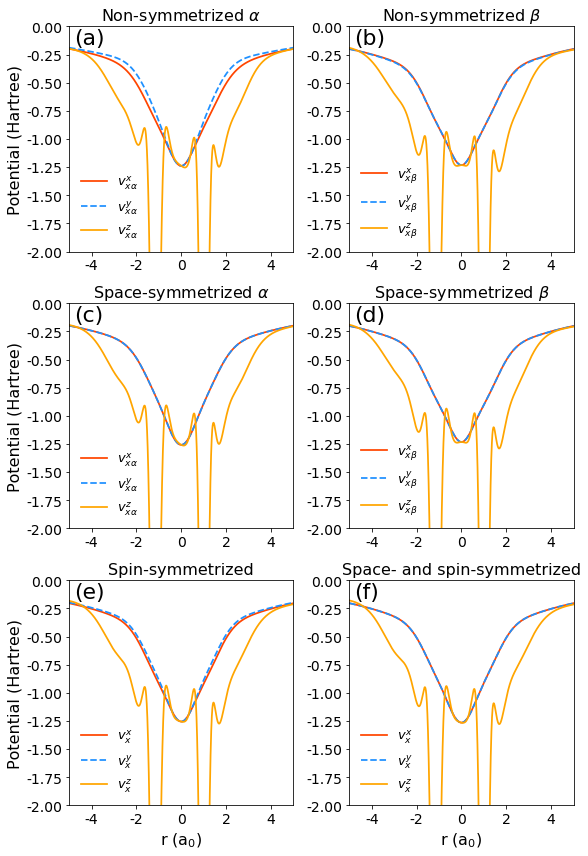

In [32]:
plot_mol("no")

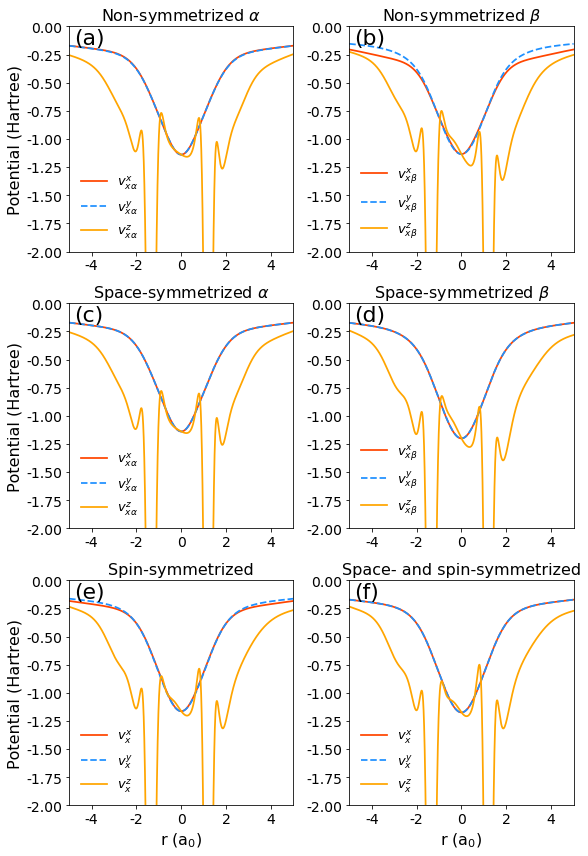

In [33]:
plot_mol("of")

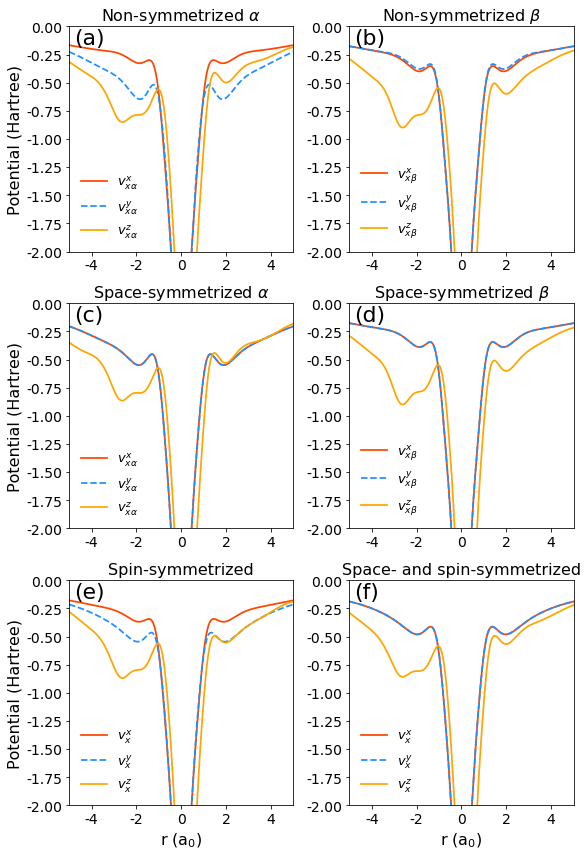

In [34]:
plot_mol("sih")

In [35]:
# collect data for table for both atoms and molecules
results = []
for atom in list(atoms_lki.keys()):
    results.append([atom, \
                    etot_atoms['Standard'][atom], \
                    etot_atoms['VH'][atom], \
                    etot_atoms['VH'][atom]-etot_atoms['Standard'][atom]])
for i, mol in enumerate(config.MOLS):
    results.append([config.MOLS_[i], \
                    etot_molecules['Standard'][mol], \
                    etot_molecules['VH'][mol], \
                    etot_molecules['VH'][mol]-etot_molecules['Standard'][mol]])

# print table
print(tabulate(results,
               headers=["System",
                        "Standard",
                        "Non-symmetrized",
                        "difference"],
               floatfmt="11.6f",
               tablefmt=config.tablefmt))

System       Standard    Non-symmetrized    difference
Li          -7.432471          -7.432470      0.000001
Be         -14.572267         -14.572261      0.000007
B          -24.531396         -24.531364      0.000032
C          -37.691835         -37.691837     -0.000001
N          -54.403196         -54.403209     -0.000013
O          -74.816728         -74.816731     -0.000004
F          -99.413730         -99.413730      0.000000
Ne        -128.544879        -128.544872      0.000007
Na        -161.857609        -161.857619     -0.000010
Mg        -199.611782        -199.611759      0.000023
Al        -241.877033        -241.877090     -0.000056
Si        -288.854259        -288.854195      0.000064
P         -340.714242        -340.714147      0.000095
S         -397.507492        -397.507376      0.000115
Cl        -459.483571        -459.483434      0.000137
Ar        -526.811715        -526.811510      0.000205
CH         -38.281640         -38.281645     -0.000005
NO        

In [36]:
PATH_NO_SYM = "W4-11/NO_SYM"
PATH_SPACE_SYM = "W4-11/SPACE_SYM"
PATH_FULL_SYM = "W4-11/FULL_SYM"

with open("pkl/W4-11RE.pkl", "rb") as file_obj:
    reacts_w4_11re = pickle.load(file_obj)

In [37]:
reacts_w4_11re_spin={}
for reac in reacts_w4_11re:
    spin = False
    for mol in reacts_w4_11re[reac]["molecules"]:
        if W4_11.systems[mol]["spin"] > 0:
            spin = True
    if spin == True:
        reacts_w4_11re_spin[reac] = reacts_w4_11re[reac]

In [38]:
spin_systems = []
for system in W4_11.systems.keys():
    if W4_11.systems[system]["spin"] > 0:
        spin_systems.append(system)
print("Number of spin-polarized system:", len(spin_systems))
print("Number of reactions in W4-11RE:", len(reacts_w4_11re))
print("Number of reactions in W4-11RE with spin-polarized systems:", len(reacts_w4_11re_spin))

Number of spin-polarized system: 46
Number of reactions in W4-11RE: 11247
Number of reactions in W4-11RE with spin-polarized systems: 6560


In [39]:
def get_etot(data_path, keys):
    # Collect total energies
    etot = {}
    for key in keys:
        for line in open(os.path.join(data_path, key, "output"), "r"):
            if "SCEXX Total" in line:
                en = float(line.split()[-1])
        etot[key] = en
    return etot

etot_no_sym = get_etot(PATH_NO_SYM, W4_11.systems.keys())
etot_space_sym = get_etot(PATH_SPACE_SYM, W4_11.systems.keys())
etot_full_sym = get_etot(PATH_FULL_SYM, W4_11.systems.keys())

In [40]:
def get_mae(reactions, etot):
    k = 0
    e_calc = np.zeros(len(reactions))
    e_ref = np.zeros(len(reactions))
    for i in reactions:
        ec = 0.0
        for j in range(len(reactions[i]["c"])):
            ec += reactions[i]["c"][j] * etot[reactions[i]["molecules"][j]]
        e_calc[k] = ec * 627.50960803059
        e_ref[k] = reactions[i]["reference"]
        k += 1
    mae = np.mean(abs(e_calc - e_ref))
    return mae, e_calc, e_ref

mae_nosym_w4_11re, _, _ = get_mae(reacts_w4_11re, etot_no_sym)
mae_nosym_w4_11re_spin, _, _ = get_mae(reacts_w4_11re_spin, etot_no_sym)

mae_spacesym_w4_11re, _, _ = get_mae(reacts_w4_11re, etot_space_sym)
mae_spacesym_w4_11re_spin, _, _ = get_mae(reacts_w4_11re_spin, etot_space_sym)

mae_fullsym_w4_11re, _, _ = get_mae(reacts_w4_11re, etot_full_sym)
mae_fullsym_w4_11re_spin, _, _ = get_mae(reacts_w4_11re_spin, etot_full_sym)

In [41]:
table = [["Non-symmetrized", mae_nosym_w4_11re, mae_nosym_w4_11re_spin],\
         ["Space-symmetrized", mae_spacesym_w4_11re, mae_spacesym_w4_11re_spin],\
         ["Space- and spin-symmetrized", mae_fullsym_w4_11re, mae_fullsym_w4_11re_spin]]

print(tabulate(table,
               headers=["Method", 
                        "W4-11RE", 
                        "W4-11RE-spin", 
                        "Ref."], floatfmt="5.2f",
               tablefmt=config.tablefmt))

Method                         W4-11RE    W4-11RE-spin
Non-symmetrized                  16.18           18.99
Space-symmetrized                16.01           18.69
Space- and spin-symmetrized      14.56           16.21


In [42]:
def get_mae_etot(systems, etot1, etot2):
    mae = 0
    for system in systems:
        mae += abs(etot1[system] - etot2[system])*627.50960803059
    mae /= len(systems)
    return mae

print("")
mae = get_mae_etot(W4_11.systems, etot_no_sym, etot_space_sym)
print(f"MAE(W4-11_etot, NON_SYM - SPACE_SYM, all): {mae:.3f}")
mae = get_mae_etot(spin_systems, etot_no_sym, etot_space_sym)
print(f"MAE(W4-11_etot, NON_SYM - SPACE_SYM, spin): {mae:.3f}")
mae = get_mae_etot(W4_11.systems, etot_no_sym, etot_full_sym)
print(f"MAE(W4-11_etot, NON_SYM - FULL_SYM, all): {mae:.3f}")
mae = get_mae_etot(spin_systems, etot_no_sym, etot_full_sym)
print(f"MAE(W4-11_etot, NON_SYM - FULL_SYM, spin): {mae:.3f}")


MAE(W4-11_etot, NON_SYM - SPACE_SYM, all): 0.373
MAE(W4-11_etot, NON_SYM - SPACE_SYM, spin): 1.142
MAE(W4-11_etot, NON_SYM - FULL_SYM, all): 2.281
MAE(W4-11_etot, NON_SYM - FULL_SYM, spin): 7.448
